In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def moving_average(data, window_size):
    return data.rolling(window=window_size).mean()

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
os.chdir(parent_dir)

print(f'Current working directory: {os.getcwd()}')

window_size = 10

Current working directory: /home/jprodanov/resource-elastisity-nancy


In [2]:
from matplotlib import rc

rc('text', usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})

In [7]:
# models = {
#     'dqn/mdqn310ep1000m25inc2_rf_20rps5.0alpha10001res_double_dueling': 'Multi Agent DDDQN',
#     'ddpg/221ep_2rf_20rps5.0alpha_50scale1000resources': 'Mutli Agent Granular DDPG',
#     # 'ppo/66ep_rf_2_30rps8kepochs5alpha50scale_a0priority_newloading_instantscale_NOreseting_vari_res_pretrained': 'Multi Agent Instant PPO',
#     'ppo/210ep_rf_2_20rps10kepochs5alpha10epupdate50scale_a_1000resources': 'Multi Agent Granular PPO',
# }

models = {
    # 'trained/dqn/mdqn1000ep1000m25inc2_rf_20rps5.0alpha1000res': 'DQN with 3 actions',
    'trained/dqn/mdqn1000ep1000m25inc2_rf_20rps5.0alpha1000res': 'MARLISE-DQN',
    # 'trained/dqn/mdqn1000ep1000m25inc2_rf_20rps5.0alpha1000res_double': 'Double DQN with 3 actions',
    # 'trained/dqn/mdqn1000ep1000m25inc2_rf_20rps5.0alpha1000res_dueling': 'Dueling DQN with 3 actions',
    # 'trained/dqn/mdqn1000ep1000m25inc2_rf_20rps5.0alpha1000res_double_dueling': 'Double Dueling DQN with 3 actions',
    # 'src/model_metric_data/dqn_j_experiments/mdqn1000ep1000m25inc2_rf_20rps5.0alpha1000res_five_actions': 'DQN with 5 actions',
    # 'src/model_metric_data/dqn_j_experiments/mdqn1000ep1000m25inc2_rf_20rps5.0alpha1000res_eleven_actions': 'DQN with 11 actions',
    # 'src/model_metric_data/dqn_j_experiments/mdqn200ep1000m25inc2_rf_20rps5.0alpha1000res_five_actions': 'DQN Five Actions',
    # 'src/model_metric_data/dqn_j_experiments/mdqn200ep1000m25inc2_rf_20rps5.0alpha1000res_eleven_actions': 'DQN Eleven Actions',
    # 'src/model_metric_data/ddpg_j_experiments/200ep_2rf_20rps5.0alpha_instant1000resources': 'DDPG Instant Scale',
    'trained/ddpg/1000ep_2rf_20rps5.0alpha_50scale1000resources': 'MARLISE-DDPG',
    # 'trained/ddpg/1000ep_2rf_20rps5.0alpha_instant1000resources': 'DDPG with instant resource change',
    # 'src/model_metric_data/ppo_j_experiments/300ep_rf_2_20rps10kepochs5alpha10epupdate_instantscale_1000resources': 'PPO Instant',
    # 'trained/ppo/1000ep_rf_2_20rps10kepochs5alpha10epupdate_discrete50scale_a_1000resources': 'Discrete PPO',
    # 'trained/ppo/1000ep_rf_2_20rps10kepochs5alpha10epupdate50scale_a_1000resources': 'PPO with gradual resource change',
    'trained/ppo/1000ep_rf_2_20rps10kepochs5alpha10epupdate50scale_a_1000resources': 'MARLISE-PPO',
    # 'trained/ppo/500ep_rf_2_20rps10kepochs5alpha10epupdate_instantscale_1000resources': 'PPO with instant resource change',
}

In [21]:
# Extract response times and rewards for best algs to csv file
df = pd.DataFrame()
for model_path, label in models.items():
    ep_summed_rewards = pd.read_csv(f'{model_path}/ep_summed_rewards.csv')
    ep_average_response_times = pd.read_csv(f'{model_path}/ep_latencies.csv')

    # df['alg'] = label
    df['ep'] = ep_summed_rewards.index + 1
    df[f'ma_{label.lower()}_rewards'] = ep_summed_rewards['Reward']
    df[f'ma_{label.lower()}_response_times'] = ep_average_response_times['Mean Latency']

df.set_index('ep', inplace=True)
df.to_csv('ma_results.csv')
    

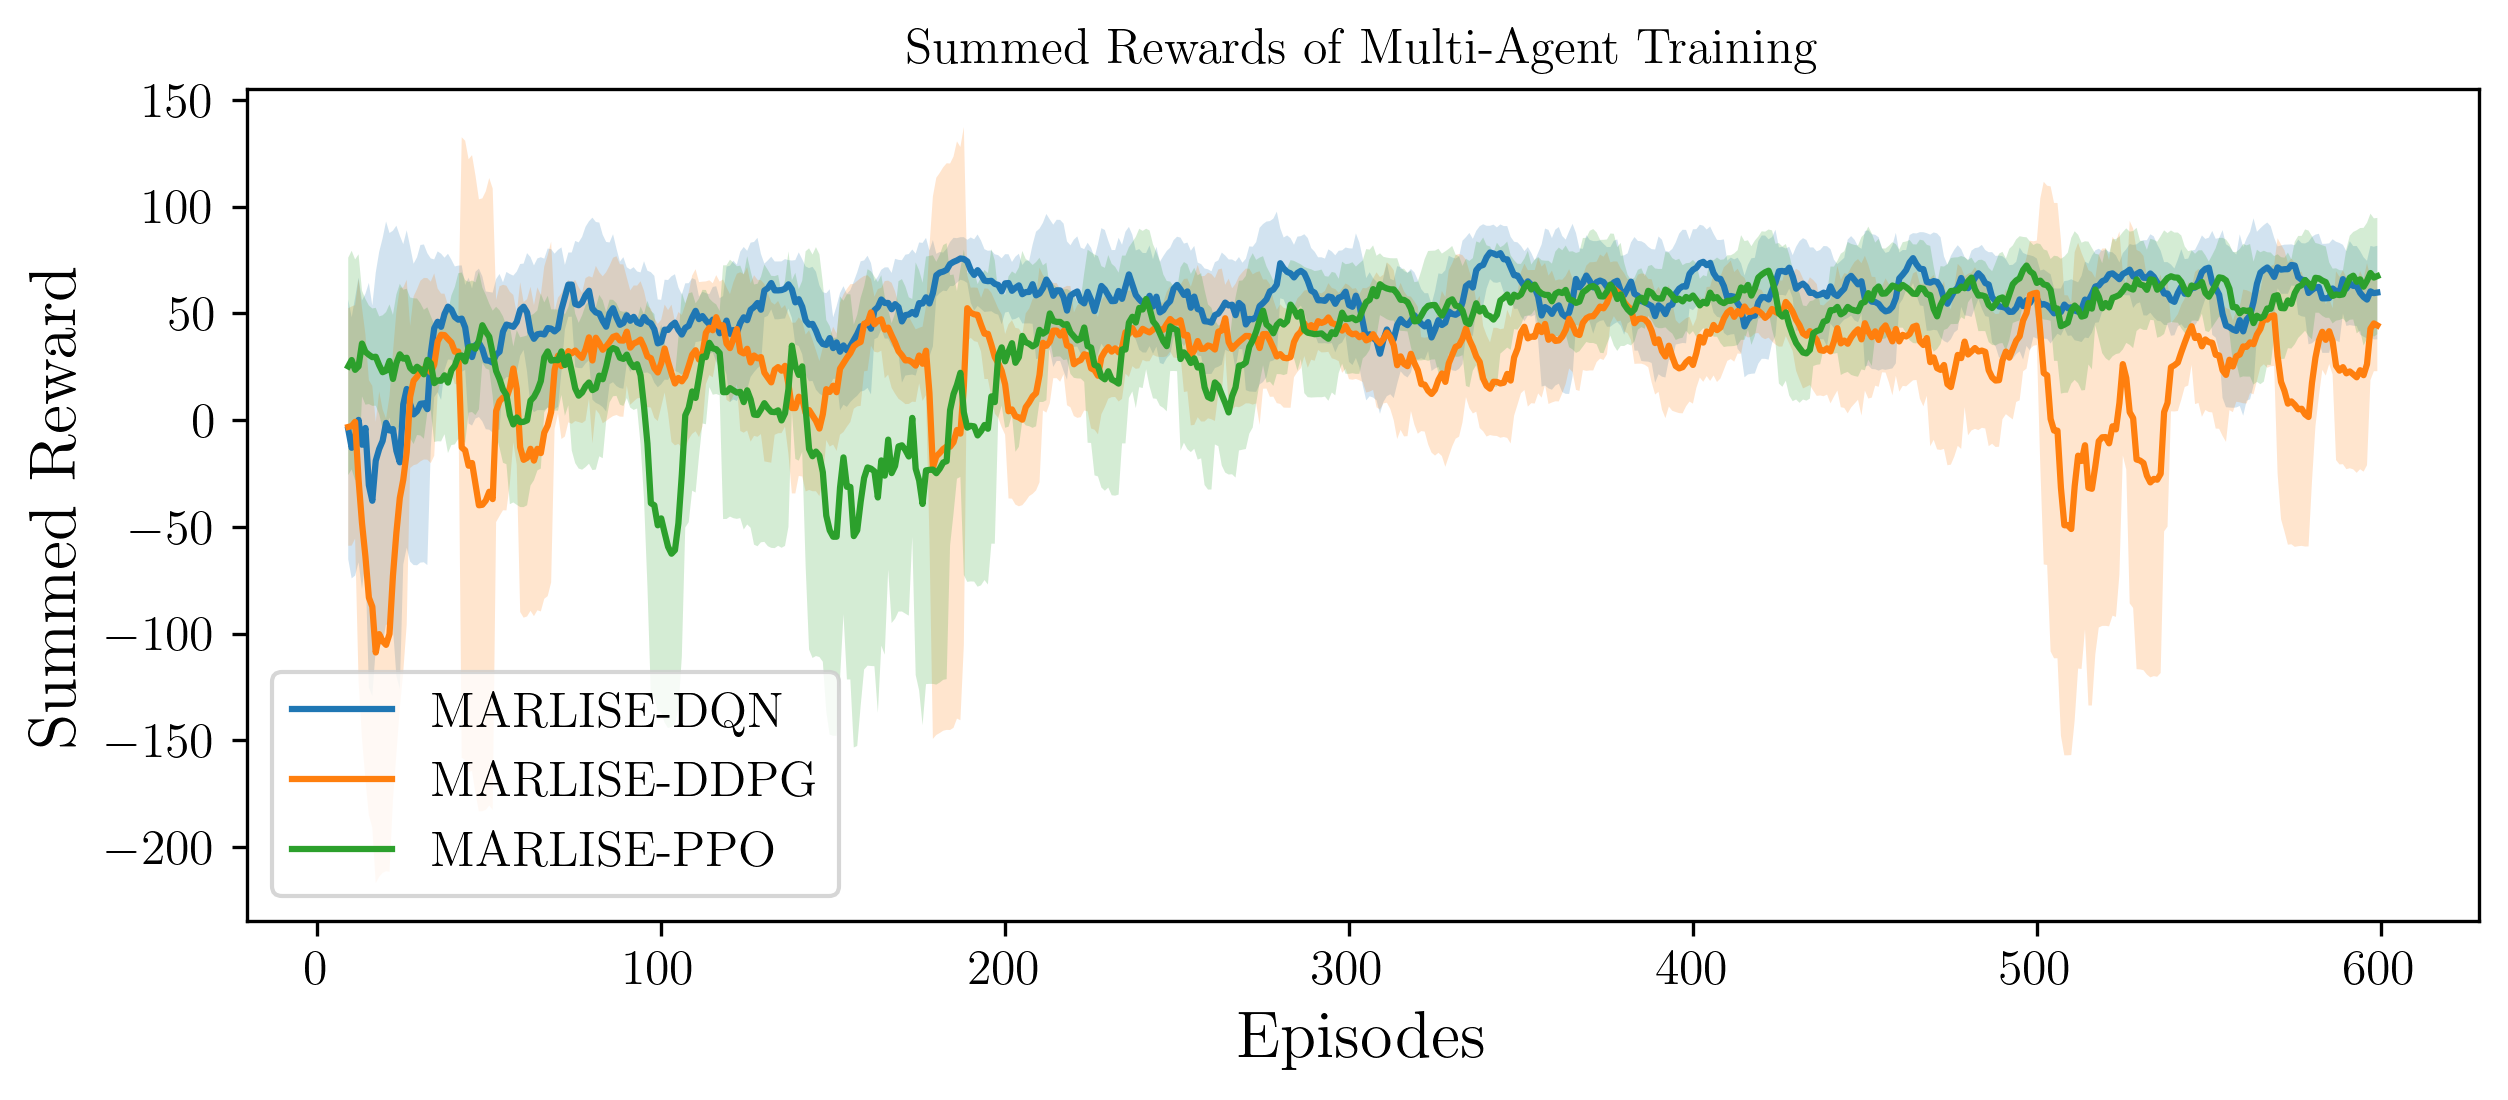

In [8]:
final_episode = 600
plt.figure(figsize=(9.6, 3.6), dpi=300)

for model_path, label in models.items():
    ep_summed_reward = pd.read_csv(model_path + '/ep_summed_rewards.csv')
    rewards = ep_summed_reward['Reward'][:final_episode]
    moving_avg = moving_average(rewards, window_size)
    std_dev = rewards.rolling(window=window_size).std()

    plt.plot(moving_avg, label=label)

    plt.fill_between(range(len(rewards)), moving_avg - std_dev, moving_avg + std_dev, alpha=0.2)

plt.legend(fontsize=12, loc='lower left')
plt.xlabel(r'Episodes', fontsize=16)
plt.ylabel(r'Summed Reward', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('figures/trained_marl.pdf', bbox_inches='tight')
plt.title(r'Summed Rewards of Multi-Agent Training')
plt.show()

/tmp/ipykernel_1880594/2404954188.py:23: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  rewards = pd.concat([rewards, pd.Series([0] * (final_episode - len(rewards)))], ignore_index=True)


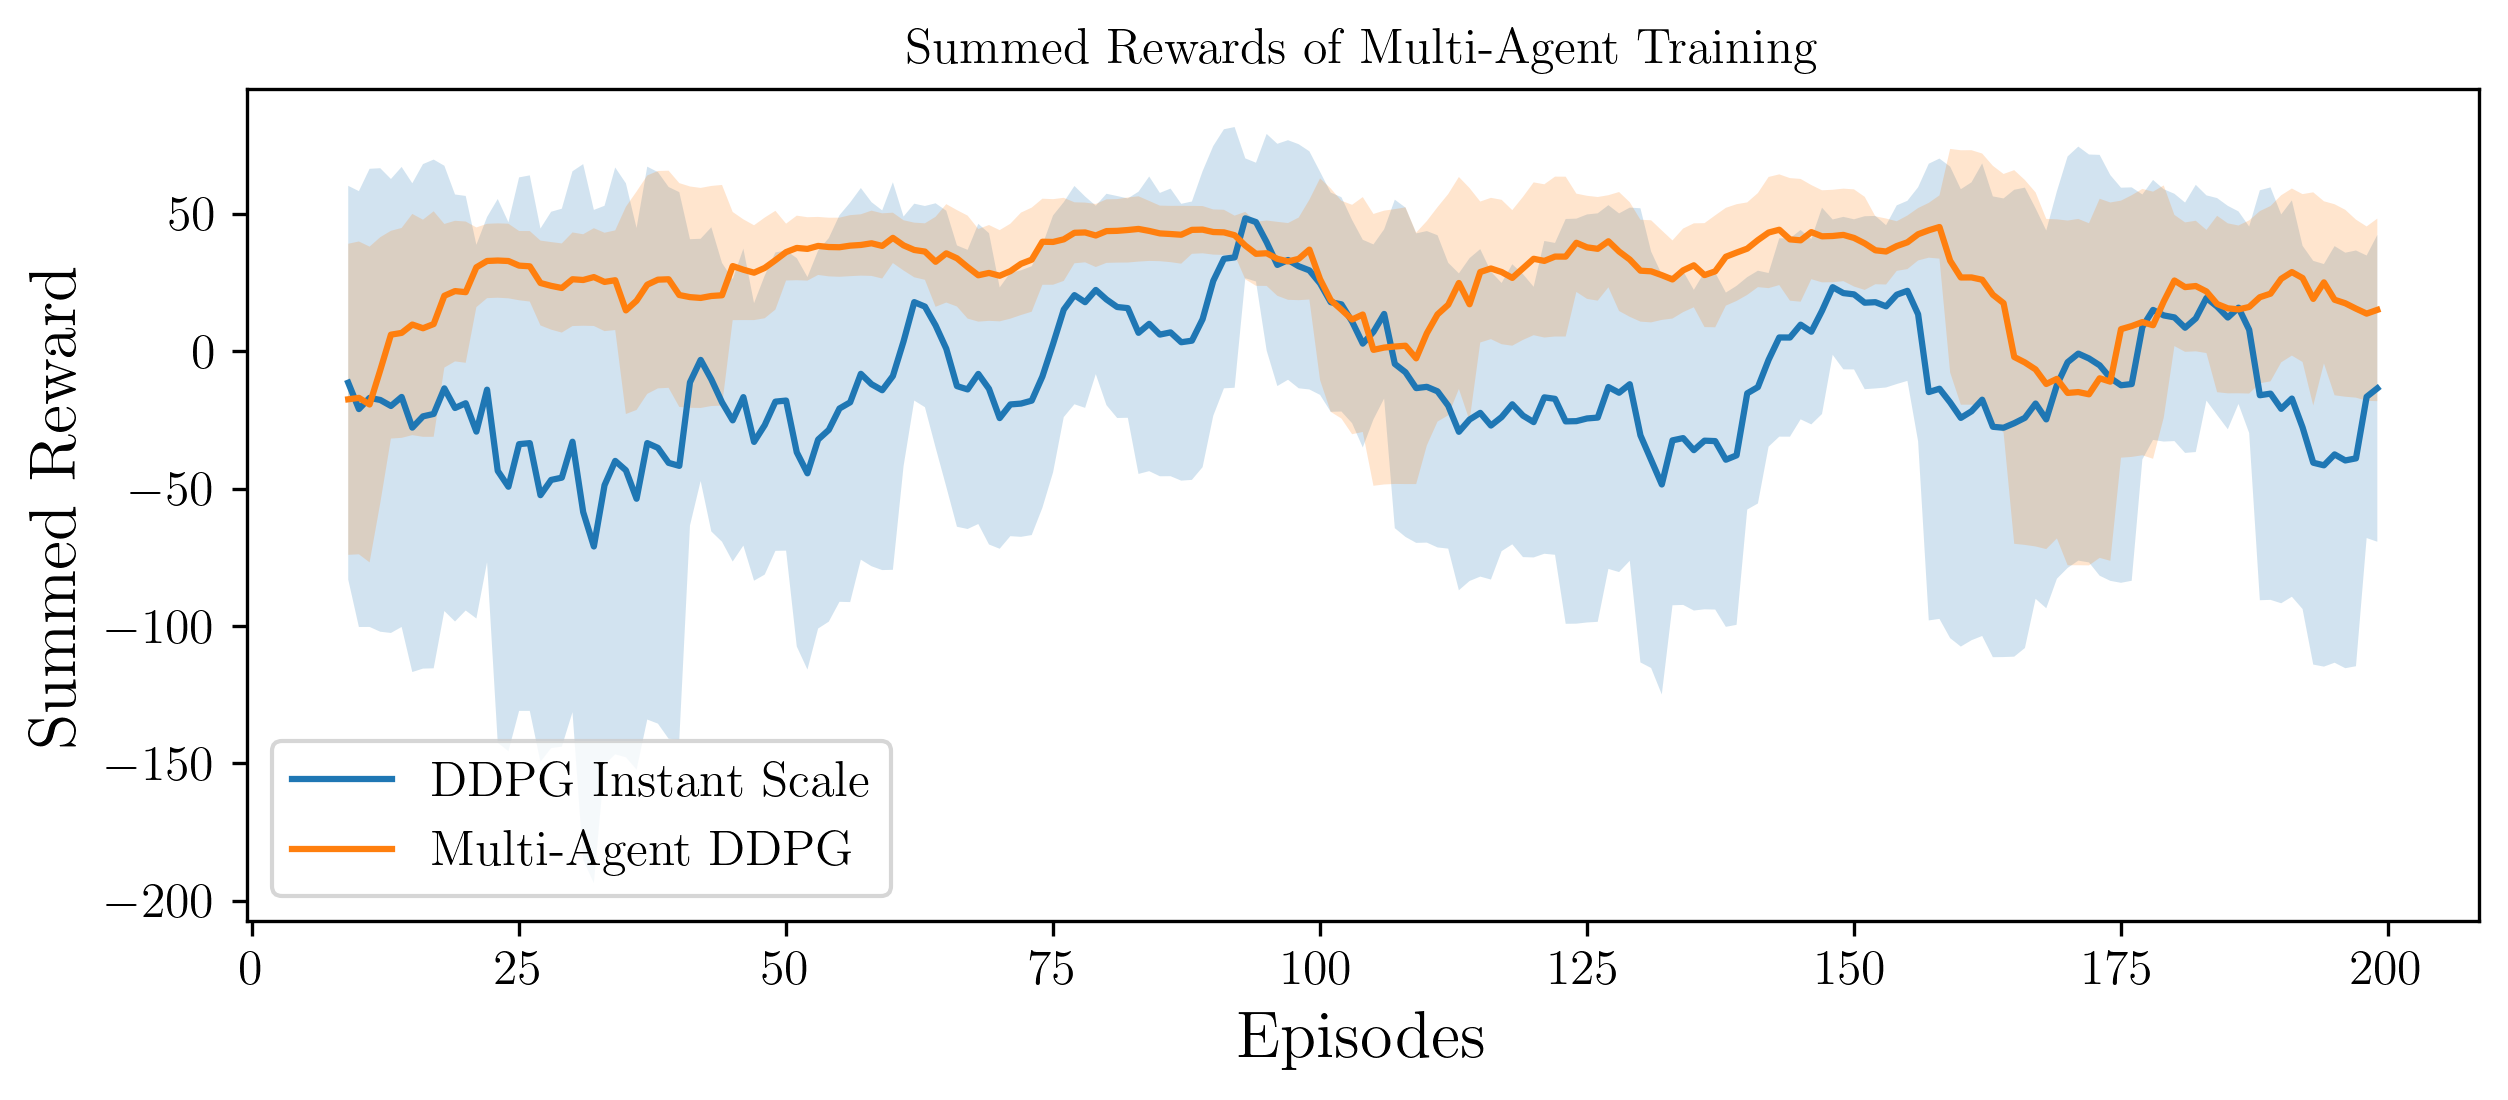

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    return data.rolling(window=window_size).mean()

def shrink_data(data, target_length):
    factor = len(data) // target_length
    return data.groupby(data.index // factor).mean()

final_episode = 200
window_size = 10  # Define your window size for moving average
plt.figure(figsize=(9.6, 3.6), dpi=300)

for model_path, label in models.items():
    ep_summed_reward = pd.read_csv(model_path + '/ep_summed_rewards.csv')
    rewards = ep_summed_reward['Reward']
    
    # Shrink data to match the final_episode length
    if len(rewards) > final_episode:
        rewards = shrink_data(rewards, final_episode)
    else:
        rewards = pd.concat([rewards, pd.Series([0] * (final_episode - len(rewards)))], ignore_index=True)
    
    moving_avg = moving_average(rewards, window_size)
    std_dev = rewards.rolling(window=window_size).std()

    plt.plot(moving_avg, label=label)
    plt.fill_between(range(final_episode), moving_avg - std_dev, moving_avg + std_dev, alpha=0.2)

plt.legend(fontsize=12)
plt.xlabel(r'Episodes', fontsize=16)
plt.ylabel(r'Summed Reward', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
# plt.savefig('figures/trained_marl.pdf', bbox_inches='tight')
plt.title(r'Summed Rewards of Multi-Agent Training')
plt.show()

In [8]:
final_episode = 200
plt.figure(figsize=(10, 4), dpi=300)

num_agents = 3
agent_ep_summed_rewards = []
for model_path, label in models.items():
    for agent_idx in range(num_agents):
        agent_rewards_df = pd.read_csv(f'{sub_folder}{model_path}/agent_{agent_idx}_ep_summed_rewards.csv')
        agent_ep_summed_rewards.append(agent_rewards_df)

        rewards = agent_rewards_df['Reward'][:final_episode]

        moving_avg = moving_average(rewards, window_size)
        std_dev = rewards.rolling(window=window_size).std()

        plt.plot(moving_avg, label=f'{label} - {agent_idx}')
        plt.fill_between(range(len(rewards)), moving_avg - std_dev, moving_avg + std_dev, alpha=0.2)

plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Summed Reward')
plt.title('Summed Rewards Moving Average with Variability for Each Agent')
plt.show()

NameError: name 'sub_folder' is not defined

<Figure size 3000x1200 with 0 Axes>